In [16]:
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.processes import Piecewise
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot
from scipy.stats import norm

In [29]:
# Makes the tuning curves perfectly spaced out
def aligned(n_neurons, radius=0.6):
    intercepts = np.linspace(-radius, radius, n_neurons)  # even spaced from -.6 to .6
    encoders = np.tile(
        [[1], [-1]], (n_neurons // 2, 1)
    )  # half care about negative, half positive
    intercepts *= encoders[:, 0]
    return intercepts, encoders


# define parameters to ease changing values
intercepts, encoders = aligned(250)
num_neurons = 250
rate = 200
radii = 5

model = nengo.Network(label="Mercier Lab1")

with model:
    # define input signal
    inp = nengo.Node(
        Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4: -2})
    )  # input node/signal (piecewise function)

    # define ensembles
    A = nengo.Ensemble(
        num_neurons,
        dimensions=1,
        max_rates=Uniform(rate, rate),
        intercepts=intercepts,
        encoders=encoders,
        radius=radii,
    )
    B = nengo.Ensemble(
        num_neurons,
        dimensions=1,
        max_rates=Uniform(rate, rate),
        intercepts=intercepts,
        encoders=encoders,
        radius=radii,
    )
    C = nengo.Ensemble(
        num_neurons,
        dimensions=1,
        max_rates=Uniform(rate, rate),
        intercepts=intercepts,
        encoders=encoders,
        radius=radii,
    )
    D = nengo.Ensemble(
        num_neurons,
        dimensions=1,
        max_rates=Uniform(rate, rate),
        intercepts=intercepts,
        encoders=encoders,
        radius=radii,
    )
    E = nengo.Ensemble(
        num_neurons,
        dimensions=1,
        max_rates=Uniform(rate, rate),
        intercepts=intercepts,
        encoders=encoders,
        radius=radii,
    )

    # define output node
    out = nengo.Node(size_in=1)

    # define functions used for computations
    def reLu_func(x):
        return np.maximum(0, x)

    def abs_func(x):
        return np.absolute(x)

    def invert_func(x):
        return x * (-1)

    def lin_func(x):
        return (2 * x) - 5

    def norm_func(x):
        return nengo.utils.numpy.norm(x)

    # connect input node to ensemble
    nengo.Connection(inp, A)

    syn_func = 0.005
    # connect ensembles to define weights (functions)
    nengo.Connection(A, B, function=reLu_func, synapse=syn_func)
    nengo.Connection(B, C, function=invert_func, synapse=syn_func)
    nengo.Connection(C, out, function=norm_func, synapse=syn_func)

    nengo.Connection(A, D, function=abs_func, synapse=syn_func)
    nengo.Connection(D, E, function=lin_func, synapse=syn_func)
    nengo.Connection(E, out, function=norm_func, synapse=syn_func)

In [30]:
syn_val = 0.0075
# probe everything
with model:
    inp_probe = nengo.Probe(inp)
    A_probe = nengo.Probe(A, synapse=syn_val)
    B_probe = nengo.Probe(B, synapse=syn_val)
    C_probe = nengo.Probe(C, synapse=syn_val)
    D_probe = nengo.Probe(D, synapse=syn_val)
    E_probe = nengo.Probe(E, synapse=syn_val)
    out_probe = nengo.Probe(out, synapse=syn_val)

    # create simulator
    with nengo.Simulator(model) as sim:
        # Run it for 5 seconds
        sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-10.0, 10.0)

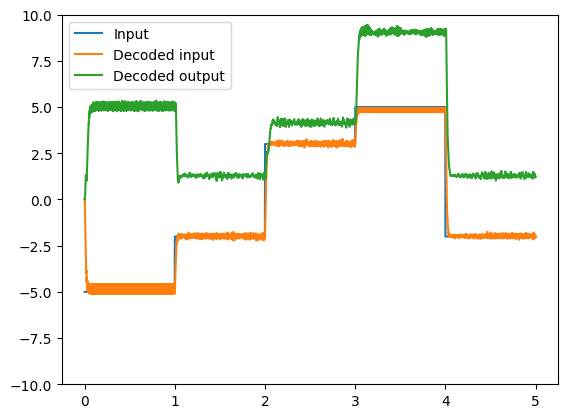

In [31]:
# Plot the probed data
plt.figure()
plt.plot(sim.trange(), sim.data[inp_probe], label="Input")
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded input")
plt.plot(sim.trange(), sim.data[out_probe], label="Decoded output")
plt.legend(loc="best")
plt.ylim(-10, 10)